## Decision Trees
### Problem : Titanic Survior Prediction Kaggle Challenge

#### Learning Goals

1. How to pre-process data?
    - Dropping not useful features
    - Filling the missing values (Data Imputation)
2. Creating a Binary Decision Tree from Scratch

### Pre-Processing Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('train.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']
data_clean = data.drop(columns_to_drop, axis=1)
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [5]:
encoder = LabelEncoder()
data_clean['Sex'] = encoder.fit_transform(data_clean['Sex'])
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [6]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


c:\users\kanav mehra\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\kanav mehra\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


[]

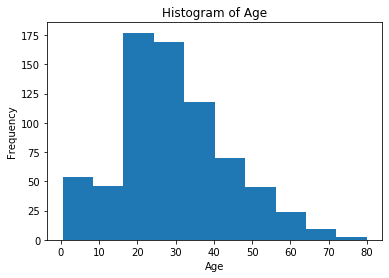

In [7]:
plt.hist(data_clean['Age'])
plt.title('Histogram of Age')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.plot()

In [8]:
data_clean = data_clean.fillna(data_clean["Age"].median())

In [9]:
input_cols = ['Pclass','Sex','Age','SibSp','Parch','Fare']
output_cols = ['Survived']

X = data_clean[input_cols]
Y = data_clean[output_cols]

print(X.shape, Y.shape)

(891, 6) (891, 1)


## Implementing Decision Trees

In [10]:
## Calculate the entropy of the data col
def entropy(col):
    
    total = col.shape[0]
    classes = np.unique(col, return_counts=True)
    counts = classes[1]
    probabilites = counts/total
    values = [(-1.0*pi*np.log2(pi)) for pi in probabilites]
    entropy = np.sum(values)
    return entropy

In [11]:
## Split the data into 2 sets based on column=key and threshold=th
def divide_data(x_data, key, th):
    
    x_left = pd.DataFrame([], columns=x_data.columns)
    x_right = pd.DataFrame([], columns=x_data.columns)
    
    for ix in range(x_data.shape[0]):
        val = x_data[key].loc[ix]
        
        if val>th:
            x_right = x_right.append(x_data.loc[ix])
        else:
            x_left = x_left.append(x_data.loc[ix])
            
    return x_left, x_right

In [12]:
## Calculate Information Gain
def information_gain(x_data, key, th):
    
    x_left, x_right = divide_data(x_data, key, th)
    
    ## Precentage of examples in each branch
    lc = float(x_left.shape[0])/x_data.shape[0]
    rc = float(x_right.shape[0])/x_data.shape[0]
    
    ## If all values are in a single branch, entropy=1
    if lc==0 or rc==0:
        return -10000000  ## Minimum information gain
    
    inf_gain = entropy(x_data.Survived) - (lc*entropy(x_left.Survived)+rc*entropy(x_right.Survived))
    return inf_gain

In [13]:
print("Information Gain for the following features -")
    
for col in X.columns:
    inf_gain = information_gain(data_clean, col, data_clean[col].mean())
    print(col, inf_gain)

Information Gain for the following features -
Pclass 0.07579362743608165
Sex 0.2176601066606142
Age 0.0008836151229467681
SibSp 0.009584541813400071
Parch 0.015380754493137694
Fare 0.042140692838995464


In [14]:
class DecisionTree:
    
    ## Class constructor for initialization
    def __init__(self, depth=0, max_depth=5):
        
        self.left = None     ## Left Node
        self.right = None    ## Right Node
        self.key = None      ## Featrue to split on
        self.th = None       ## Value (threshold) of the feature to split on
        self.depth = depth
        self.max_depth = max_depth
        self.target = None   ## Final predicted target value
        
    ## Method to train the Decision Tree    
    def train(self, X_train):
        
        inf_gains = []
        features = ['Pclass','Sex','Age','SibSp', 'Parch', 'Fare']
        
        ## Iterate over all features and append the respective information gains to a list
        for col in features:
            i_gain = information_gain(X_train, col, X_train[col].mean())
            inf_gains.append(i_gain)
            
        self.key = features[np.argmax(inf_gains)]  ## Pick feature with highest information gain to split the tree
        self.th = X_train[self.key].mean()      ## Threshold value for splitting = Mean value of the feature in the dataset
        print("Making Tree Feature is -",self.key)
        
        data_left, data_right = divide_data(X_train, self.key, self.th)  ## Divide the tree into 2 branches
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)   ## Reset the index to maintain numercial order
        
        ## Truly a leaf node
        if data_left.shape[0]==0 or data_right.shape[0]==0:
            
            if X_train.Survived.mean()>=0.5:
                self.target = 1
            else:
                self.target = 0
            return
        
        ## Stop early when Depth>=Max Depth
        if self.depth>=self.max_depth:
            
            if X_train.Survived.mean()>=0.5:
                self.target = 1
            else:
                self.target = 0
            return
        
        ## Recursive Case
        self.left = DecisionTree(depth=self.depth+1, max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth=self.depth+1, max_depth=self.max_depth)
        self.right.train(data_right)
        
        ## Set target at every node
        if X_train.Survived.mean()>=0.5:
            self.target = 1
        else:
            self.target = 0
        return
    
    ## Method to make predictions on the Test point
    def predict(self, test):
        
        if test[self.key]>=self.th:
            
            if self.right==None:
                return self.target
            else:
                return self.right.predict(test)
            
        else:
            
            if self.left==None:
                return self.target
            else:
                return self.left.predict(test)

### Train-Validation-Test Split

In [15]:
split = int(0.8*data_clean.shape[0])
train_data = data_clean[:split]
test_data = data_clean[split:]
test_data = test_data.reset_index(drop=True)

In [16]:
print(train_data.shape, test_data.shape)

(712, 7) (179, 7)


In [17]:
dt = DecisionTree()
dt.train(train_data)

Making Tree Feature is - Sex
Making Tree Feature is - Pclass
Making Tree Feature is - Age
Making Tree Feature is - SibSp
Making Tree Feature is - Pclass
Making Tree Feature is - Age
Making Tree Feature is - Age
Making Tree Feature is - SibSp
Making Tree Feature is - Parch
Making Tree Feature is - Pclass
Making Tree Feature is - SibSp
Making Tree Feature is - Fare
Making Tree Feature is - Parch
Making Tree Feature is - Age
Making Tree Feature is - Pclass
Making Tree Feature is - Age
Making Tree Feature is - Age
Making Tree Feature is - Parch
Making Tree Feature is - Age
Making Tree Feature is - Fare
Making Tree Feature is - Fare
Making Tree Feature is - SibSp
Making Tree Feature is - Age
Making Tree Feature is - Fare
Making Tree Feature is - Fare
Making Tree Feature is - Fare
Making Tree Feature is - Age
Making Tree Feature is - Age
Making Tree Feature is - Fare
Making Tree Feature is - Fare
Making Tree Feature is - Fare
Making Tree Feature is - Age
Making Tree Feature is - Fare
Making 

In [18]:
y_pred = []

for idx in range(test_data.shape[0]):
    row = test_data.iloc[idx]
    y_pred.append(dt.predict(row))
    
y_pred = np.array(y_pred)

In [19]:
## Calculate the Accuracy

y_actual = test_data.Survived.values
acc = (np.sum(y_pred==y_actual))/float(test_data.shape[0])
print('Accuracy =',acc)

Accuracy = 0.8491620111731844


### Decision Trees using SkLearn

In [20]:
from sklearn.tree import DecisionTreeClassifier

sk_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
sk_tree.fit(train_data[input_cols], train_data[output_cols])


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
sk_tree.predict(test_data[input_cols])

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [22]:
sk_tree.score(test_data[input_cols], y_actual)

0.8603351955307262

## Visualizing Decision Trees

In [23]:
import pydotplus

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

c:\users\kanav mehra\appdata\local\programs\python\python38\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


In [27]:
dot_data = StringIO()
export_graphviz(sk_tree, out_file=dot_data, filled=True, rounded=True)

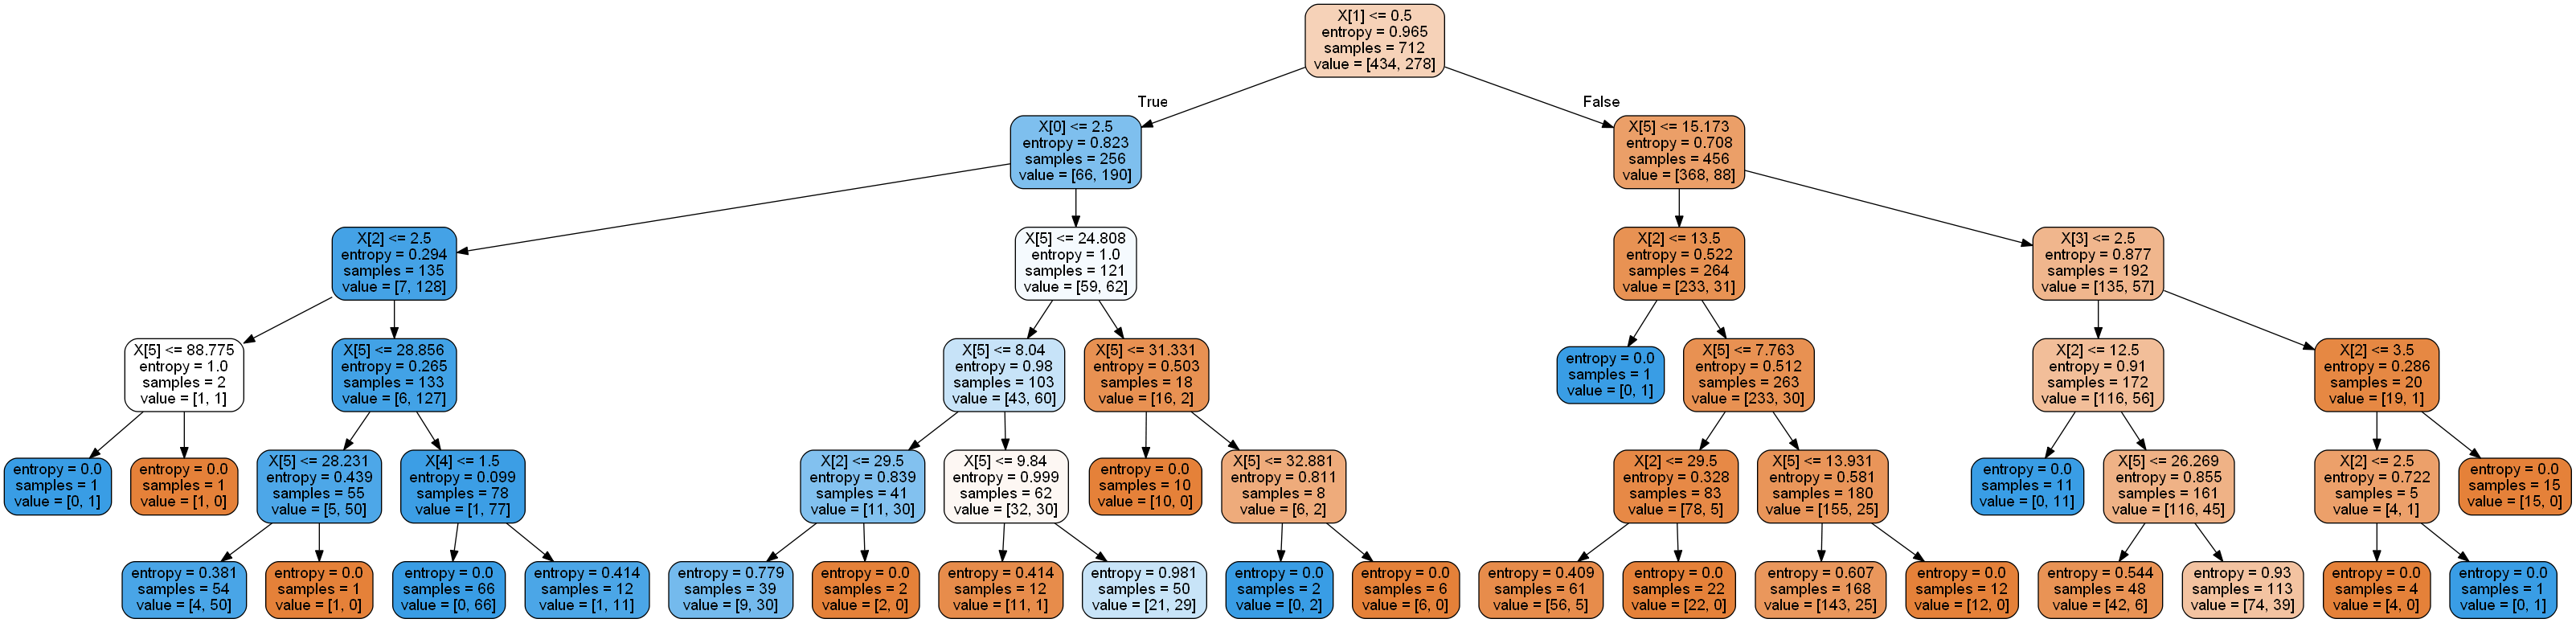

In [28]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Random Forests

In [32]:
X_train = train_data[input_cols]
Y_train = np.array(train_data[output_cols]).reshape((-1,))
X_test = test_data[input_cols]
Y_test = np.array(test_data[output_cols]).reshape((-1,))

In [34]:
sk_tree = DecisionTreeClassifier(criterion='entropy')

In [40]:
## Since the training accuracy is so high, it is likely that the tree is overfitting

sk_tree.fit(X_train, Y_train)
train_acc = sk_tree.score(X_train, Y_train)
print('Training Accuracy =',train_acc)

Training Accuracy = 0.9789325842696629


In [41]:
test_acc = sk_tree.score(X_test, Y_test)
print('Testing Accuracy =',test_acc)

Testing Accuracy = 0.8044692737430168


##### Since there is a considerable difference in the training and test accuracy, the model is likely overfitting !!

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [71]:
rf = RandomForestClassifier(criterion='entropy', n_estimators=10, max_depth=5)

In [72]:
## Since the training accuracy is so high, it is likely that the tree is overfitting

rf.fit(X_train, Y_train)
train_acc = rf.score(X_train, Y_train)
print('Training Accuracy =',train_acc)

Training Accuracy = 0.8314606741573034


In [73]:
test_acc = rf.score(X_test, Y_test)
print('Testing Accuracy =',test_acc)

Testing Accuracy = 0.8603351955307262


In [102]:
## Using Cross Validation

acc = cross_val_score(RandomForestClassifier(criterion='entropy', n_estimators=10, max_depth=5), X_train, Y_train, cv=5)

In [103]:
print('CV Score =',acc.mean())

CV Score = 0.8020782034866543


In [141]:
### Iterating over the hyperparameter n_estimators

acc_list = []
for ix in range(1, 50):
    cv = cross_val_score(RandomForestClassifier(criterion='entropy', n_estimators=ix, min_samples_leaf=5, max_depth=5), X_train, Y_train, cv=5)
    acc_list.append(cv.mean())

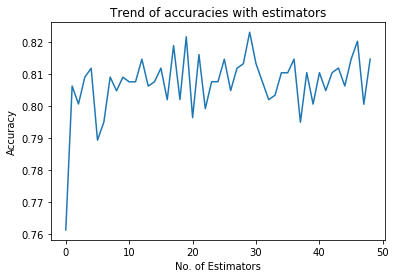

In [142]:
plt.plot(acc_list)
plt.xlabel('No. of Estimators')
plt.ylabel('Accuracy')
plt.title('Trend of accuracies with estimators')
plt.show()

In [143]:
## Find no.of trees for maximum accuracy 
np.argmax(acc_list)

29

In [179]:
## Test Accuracy with 41 trees

model = RandomForestClassifier(criterion='entropy', n_estimators=29, max_depth=10, min_samples_leaf=2)
model.fit(X_train, Y_train)
test_acc = model.score(X_test, Y_test)
print('Test Accuracy with 41 estimators =',test_acc)

Test Accuracy with 41 estimators = 0.8659217877094972
